# 1.Task Statement

**The project aims at predicting customer acceptance of a bank's offer. 
The problem is that the classes in the data are unbalanced, which requires a special approach to data processing and metrics selection.**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# 2.Data Recognition

    **Loaded the dataset and analyzed its structure (columns, data types, presence of outliers and missing data).**

In [6]:
df = pd.read_csv(r'C:\Users\dkost\Desktop\DS_ML_Final_projects\Bank Loan\data\Bank_Personal_Loan_Modelling.csv')

* ID: Customer ID.

* Age: Customer's age in completed years.

* Experience: Years of professional experience.

* Income: Annual income of the customer.

* ZIP Code: Home Address ZIP code.

* Family: Family size of the customer.

* CCAvg: Avg. spending on credit cards per month.

* Education: Education Level,


1. Undergrad = 1
2. Graduate = 2
3. Advance/Professional = 3


* Mortgage: Value of house mortgage if any.

* Personal Loan: Did this customer accept the persoanl loan offered in the last campaign?

* Securities Account: Does the customer have a securities account with the bank?

* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?

* Online: Does the customer use internet banking facilities?

* CreditCard: Does the customer use a credit card issued by UniversalBank?


In [7]:
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

**For comfort, I changed the column names: I combined the words in the column names, such as “ZIP Code”,"Securities Account","CD Account" and “Personal Loan”, using underscores.**

In [9]:
names = df.columns.tolist()

names[names.index('ZIP Code')] = 'ZIP_Code'
names[names.index('Personal Loan')] = 'Personal_Loan'
names[names.index('Securities Account')] = 'Securities_Account'
names[names.index('CD Account')] = 'CD_Account'

df.columns = names

In [10]:
df.head(1)

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0

**Removed the non-relevant ID column.**

In [11]:
df.drop('ID',axis=1,inplace=True)

In [12]:
df.describe()

Age   Experience       Income      ZIP_Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503000     2.396400   
std      11.463166    11.467954    46.033729   2121.852197     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal_Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean      1.937938     1.881000    56.498800       0.096000   
std       1.747659     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       0.700000     1.000000     0.000000       0.000000   
50%       1.500000     2.000000     0.000000       0.000000   
75%       2.500000     3.000000   101.000000       0.000000   
max      10.000000     3.000000   635.000000       1.000000   

       Securities_Account  CD_Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

**Analyzed the statistical characteristics of the data using the describe method. Detected outliers, for example, in the experience column, where the value was negative -3. Applied the abs function to correct the value to a positive value.**

In [13]:
df['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [14]:
df['Experience'] = abs(df['Experience'])

**Converted the average amount of credit money used per month to years**

In [15]:
df['CCAvg'] = df['CCAvg']*12

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP_Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


# 3.Missing Data Processing:
**Making sure there are no missing values in the dataset.**


In [17]:
df.isna().sum().to_frame()

0
Age                 0
Experience          0
Income              0
ZIP_Code            0
Family              0
CCAvg               0
Education           0
Mortgage            0
Personal_Loan       0
Securities_Account  0
CD_Account          0
Online              0
CreditCard          0

# 4.Correlation analysis

**Constructed a correlation matrix to identify relationships between variables and to understand which variables have the most influence on the personal loan variable.**

<Axes: >

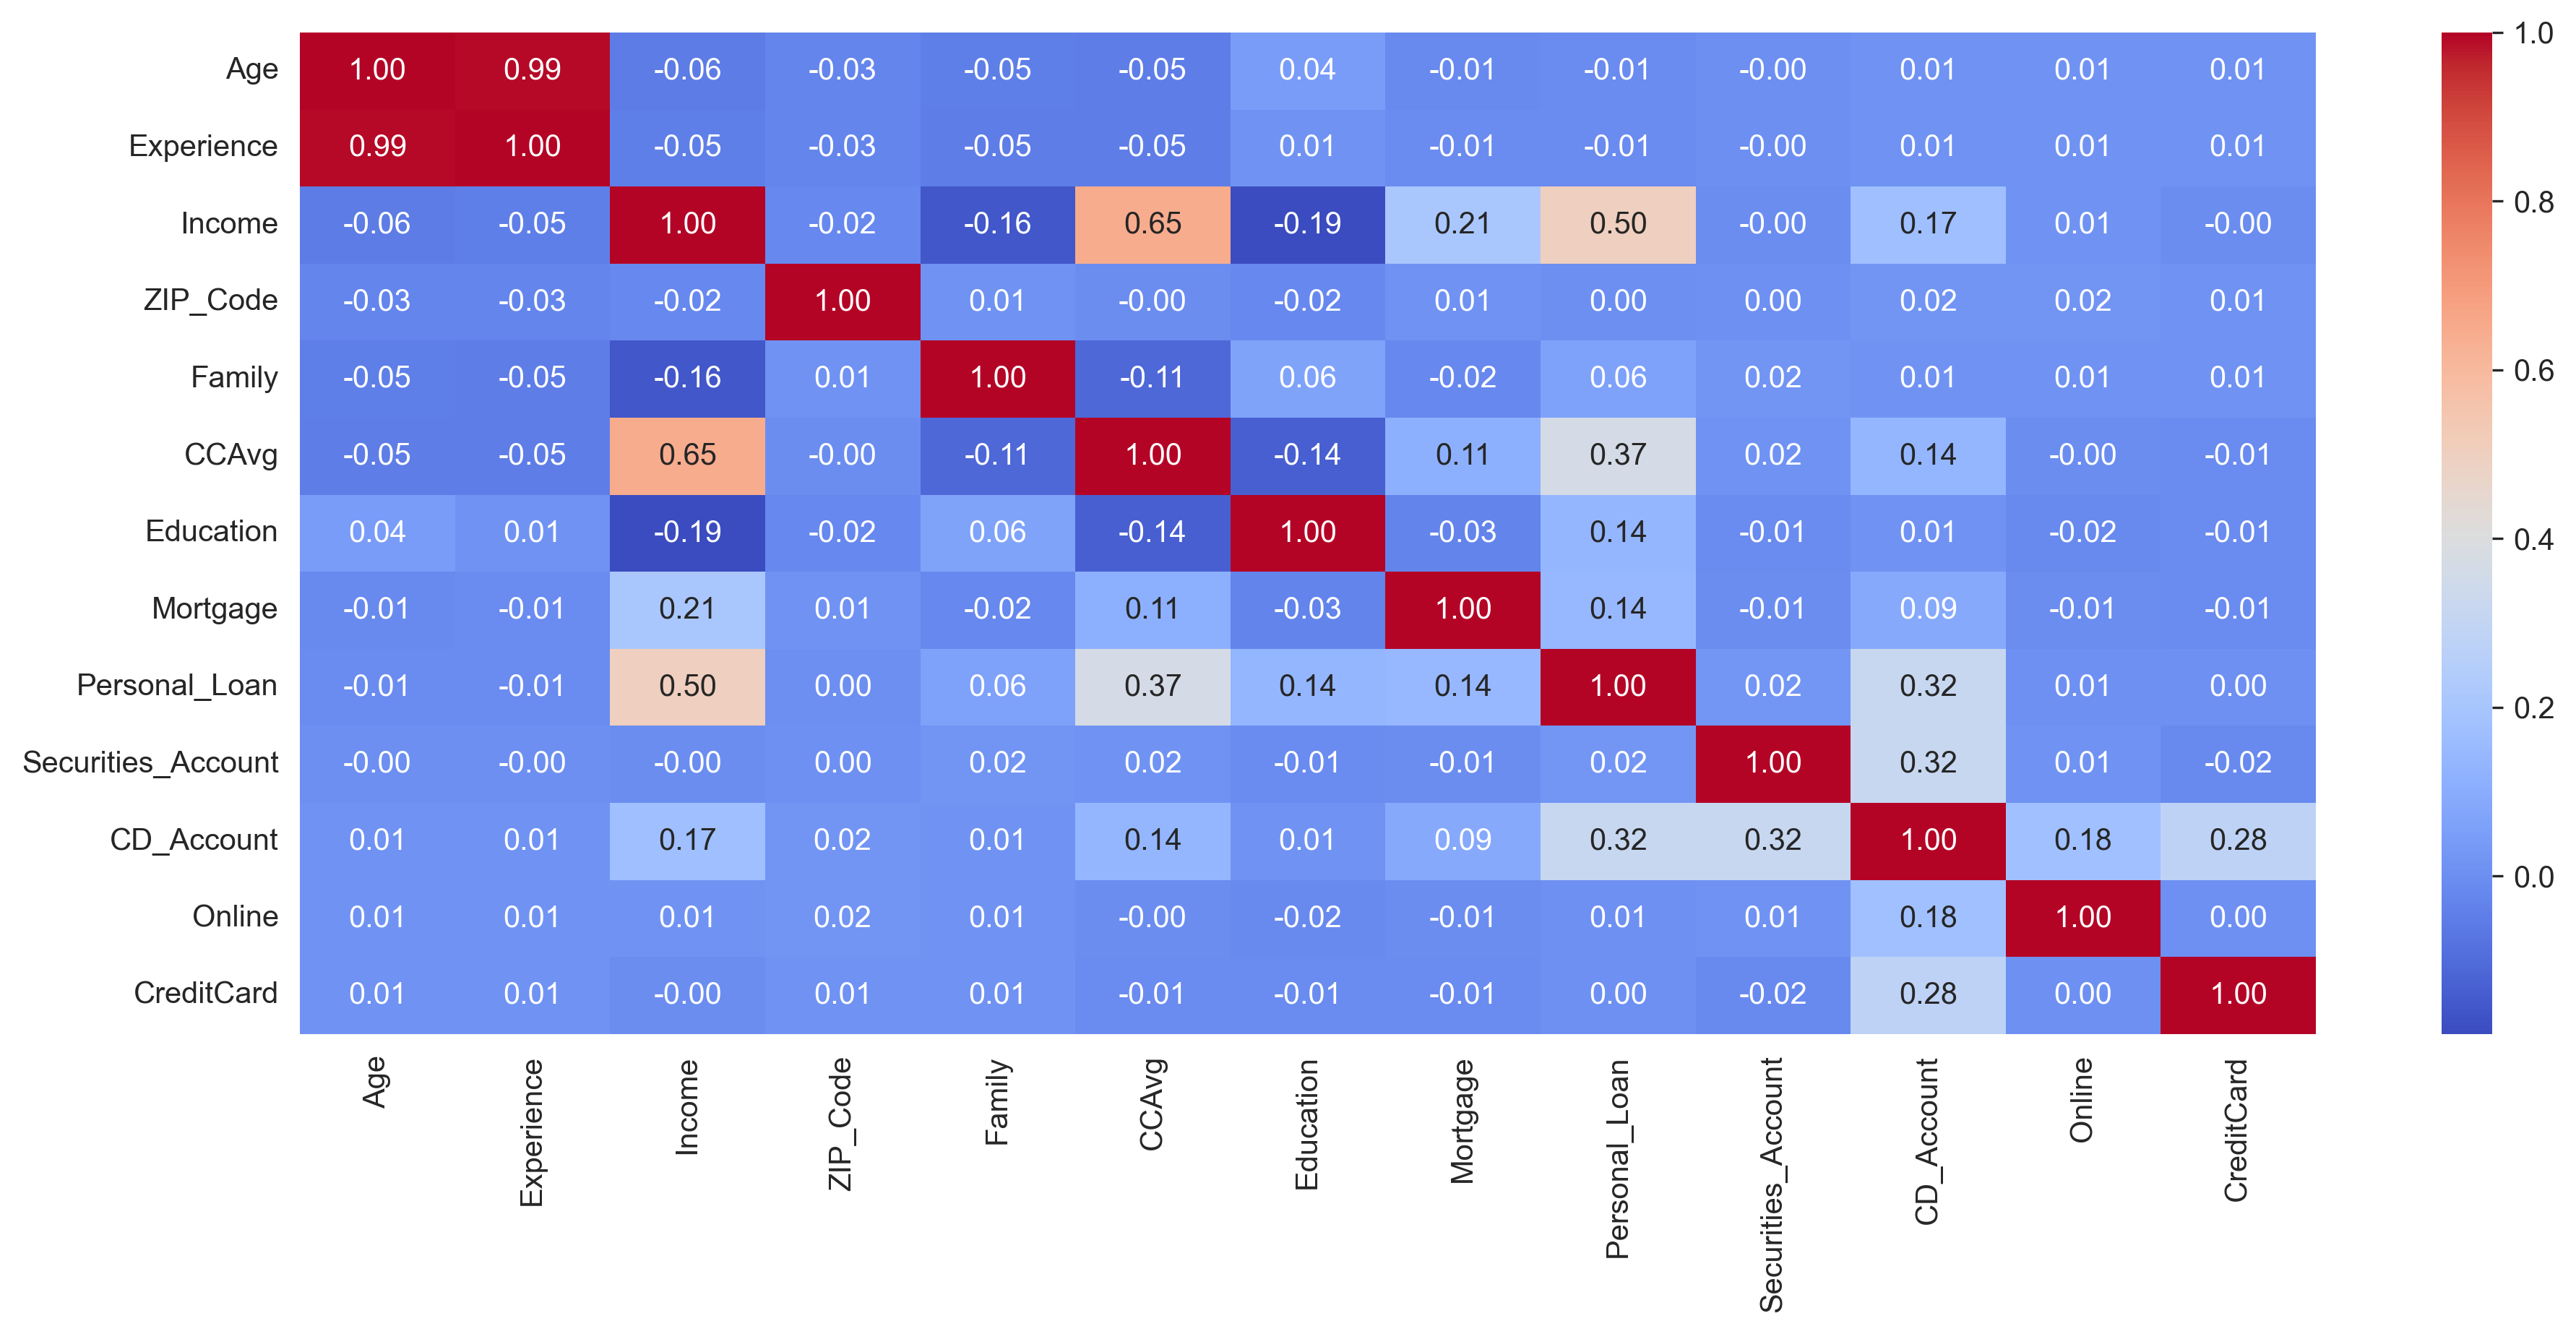

In [18]:
corr_matrix = df.corr()

plt.figure(figsize=(15,6), dpi=300)

sns.heatmap(corr_matrix,cmap='coolwarm', annot=True, fmt='.2f')

In [19]:
sort_corr = corr_matrix.sort_values('Personal_Loan',ascending=False)

sort_corr=sort_corr['Personal_Loan'].iloc[1:7]

sort_corr

Income        0.502462
CCAvg         0.366889
CD_Account    0.316355
Mortgage      0.142095
Education     0.136722
Family        0.061367
Name: Personal_Loan, dtype: float64

# 5.Data Visualization:

**Generated seven graphs to visualize categorical variables.**

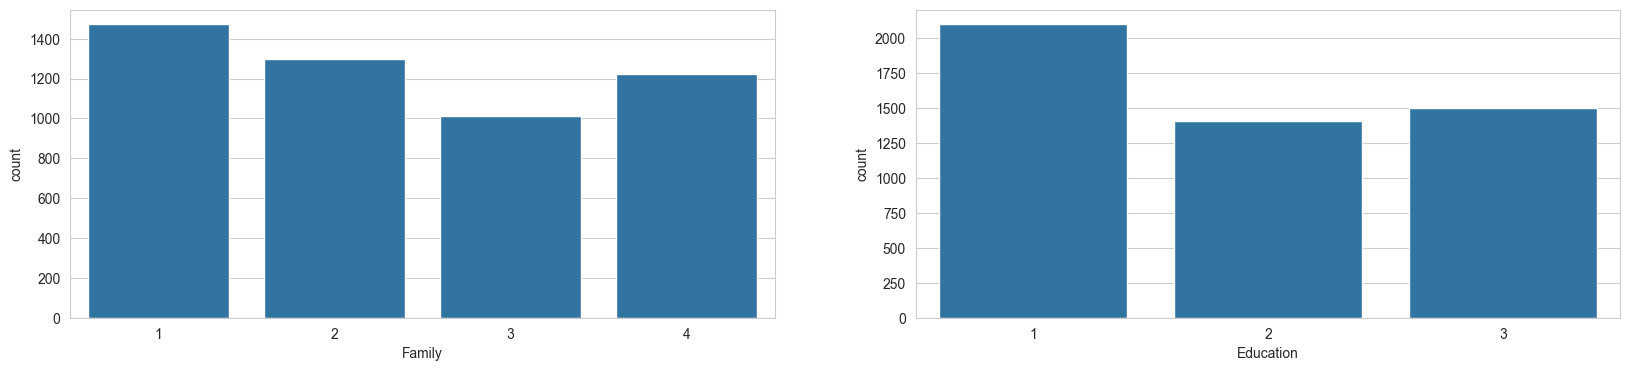

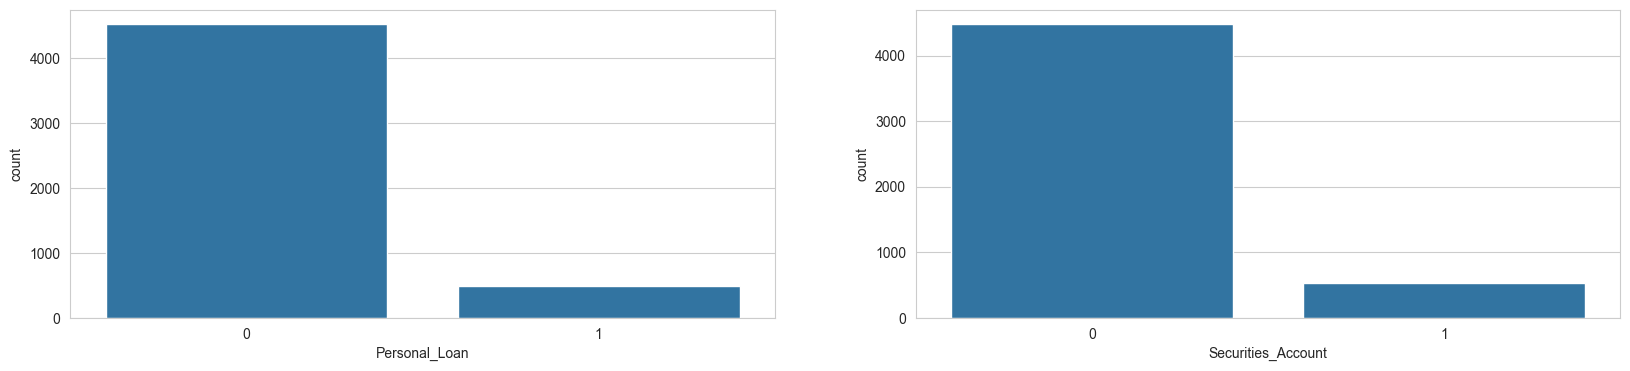

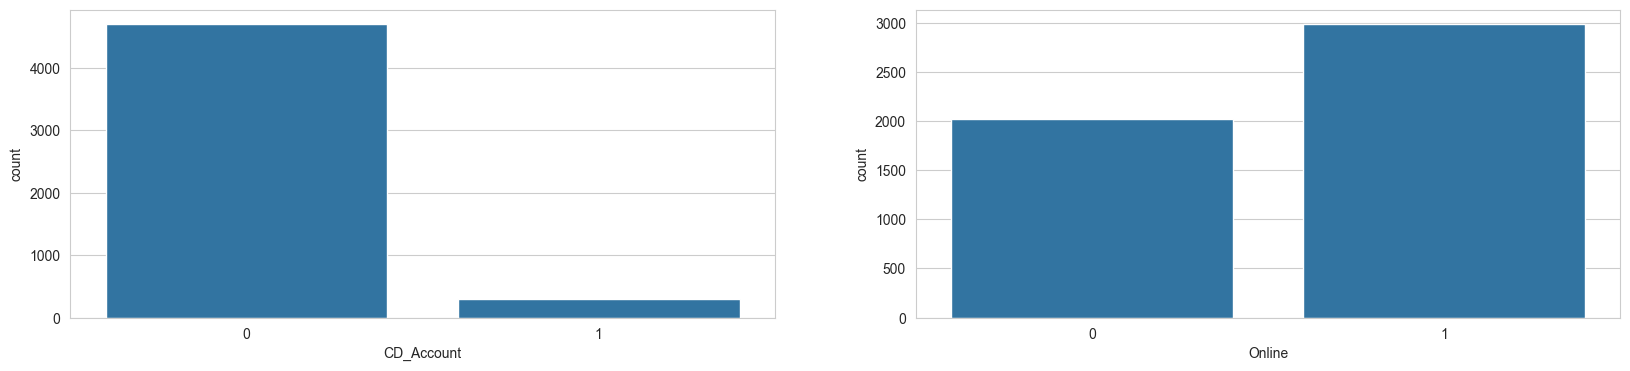

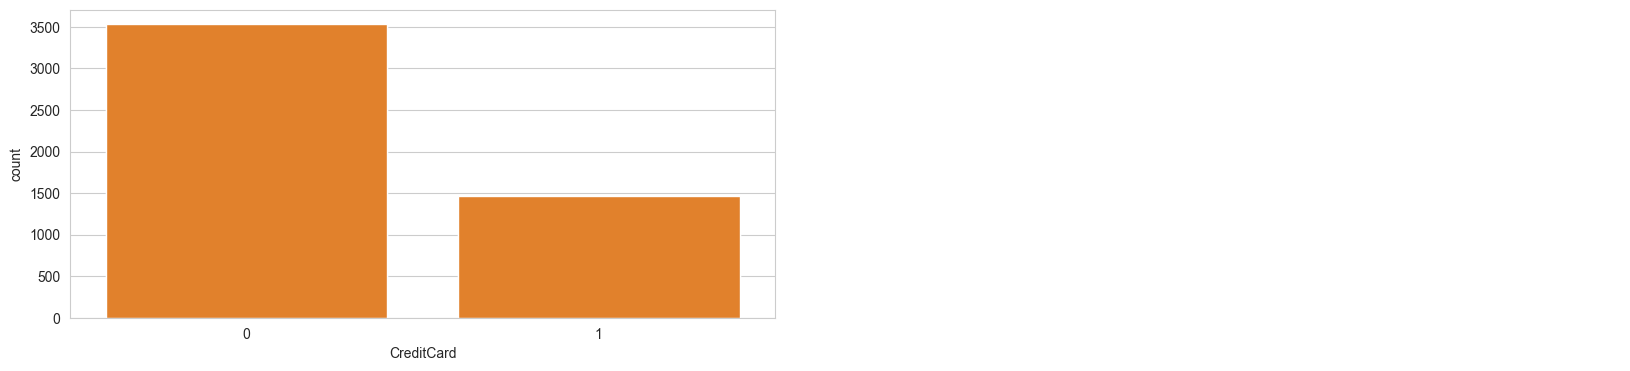

In [20]:
Categorical = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

i = 0

while i < len(Categorical):
    fig, axes = plt.subplots(1, 2, figsize=(20, 4)) 
    sns.countplot(x=Categorical[i], data=df, ax=axes[0])
    
    if i == 6:
        sns.countplot(x=Categorical[i], data=df, ax=axes[0])  
        axes[1].axis('off')  
    else:
        sns.countplot(x=Categorical[i+1], data=df, ax=axes[1])
    if i == 6:
        i += 1  
    else:
        i += 2  
    
    

**Created five graphs to analyze numerical variables.**

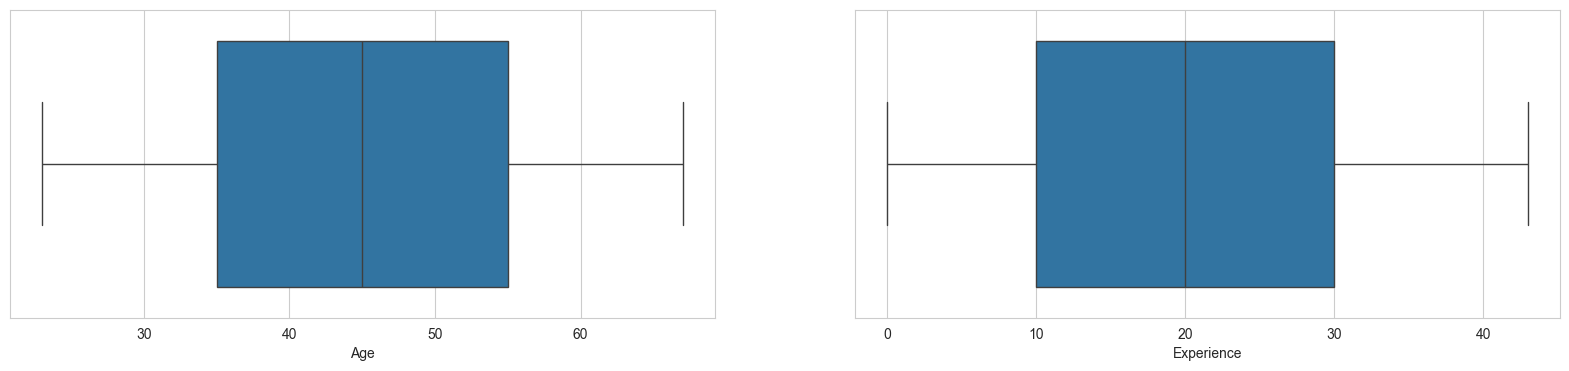

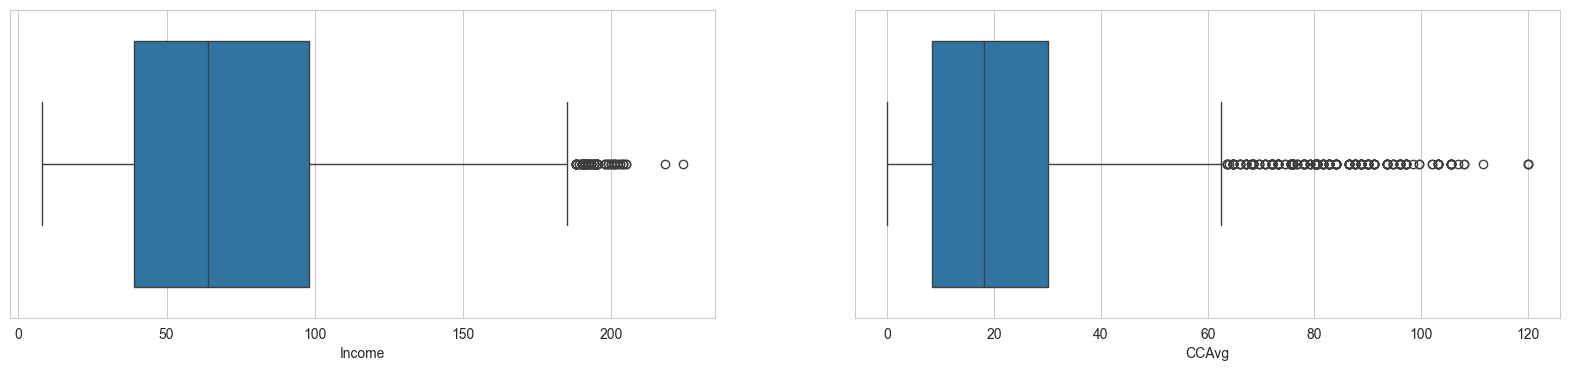

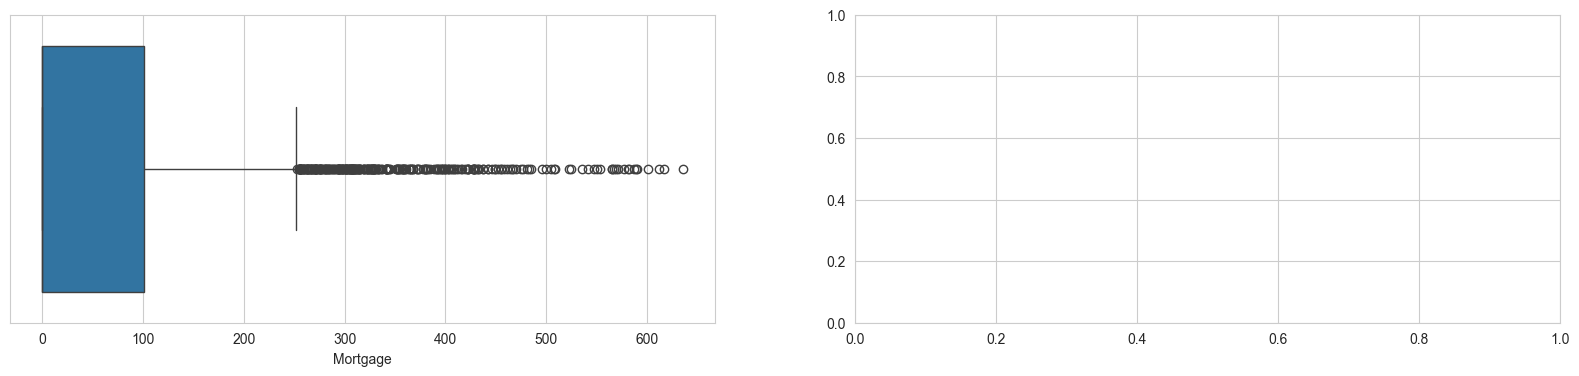

In [21]:
Numerical = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

i=0 

while i < len(Numerical):
    fig, axes = plt.subplots(1, 2, figsize=(20, 4)) 
    sns.boxplot(x=Numerical[i], data=df, ax=axes[0])
    if i==4:
        i+=2
        break
    else:
        sns.boxplot(x=Numerical[i+1], data=df, ax=axes[1])
        
    i+=2
        

**Analyzed income and how it affects the acceptance of loan terms in detail using scatterplot with the hue parameter for the personal loan variable. I found out that clients with income above 100 thousand per year are more often accepting the bank's loan terms.**

Text(0.5, 0, 'Income per year')

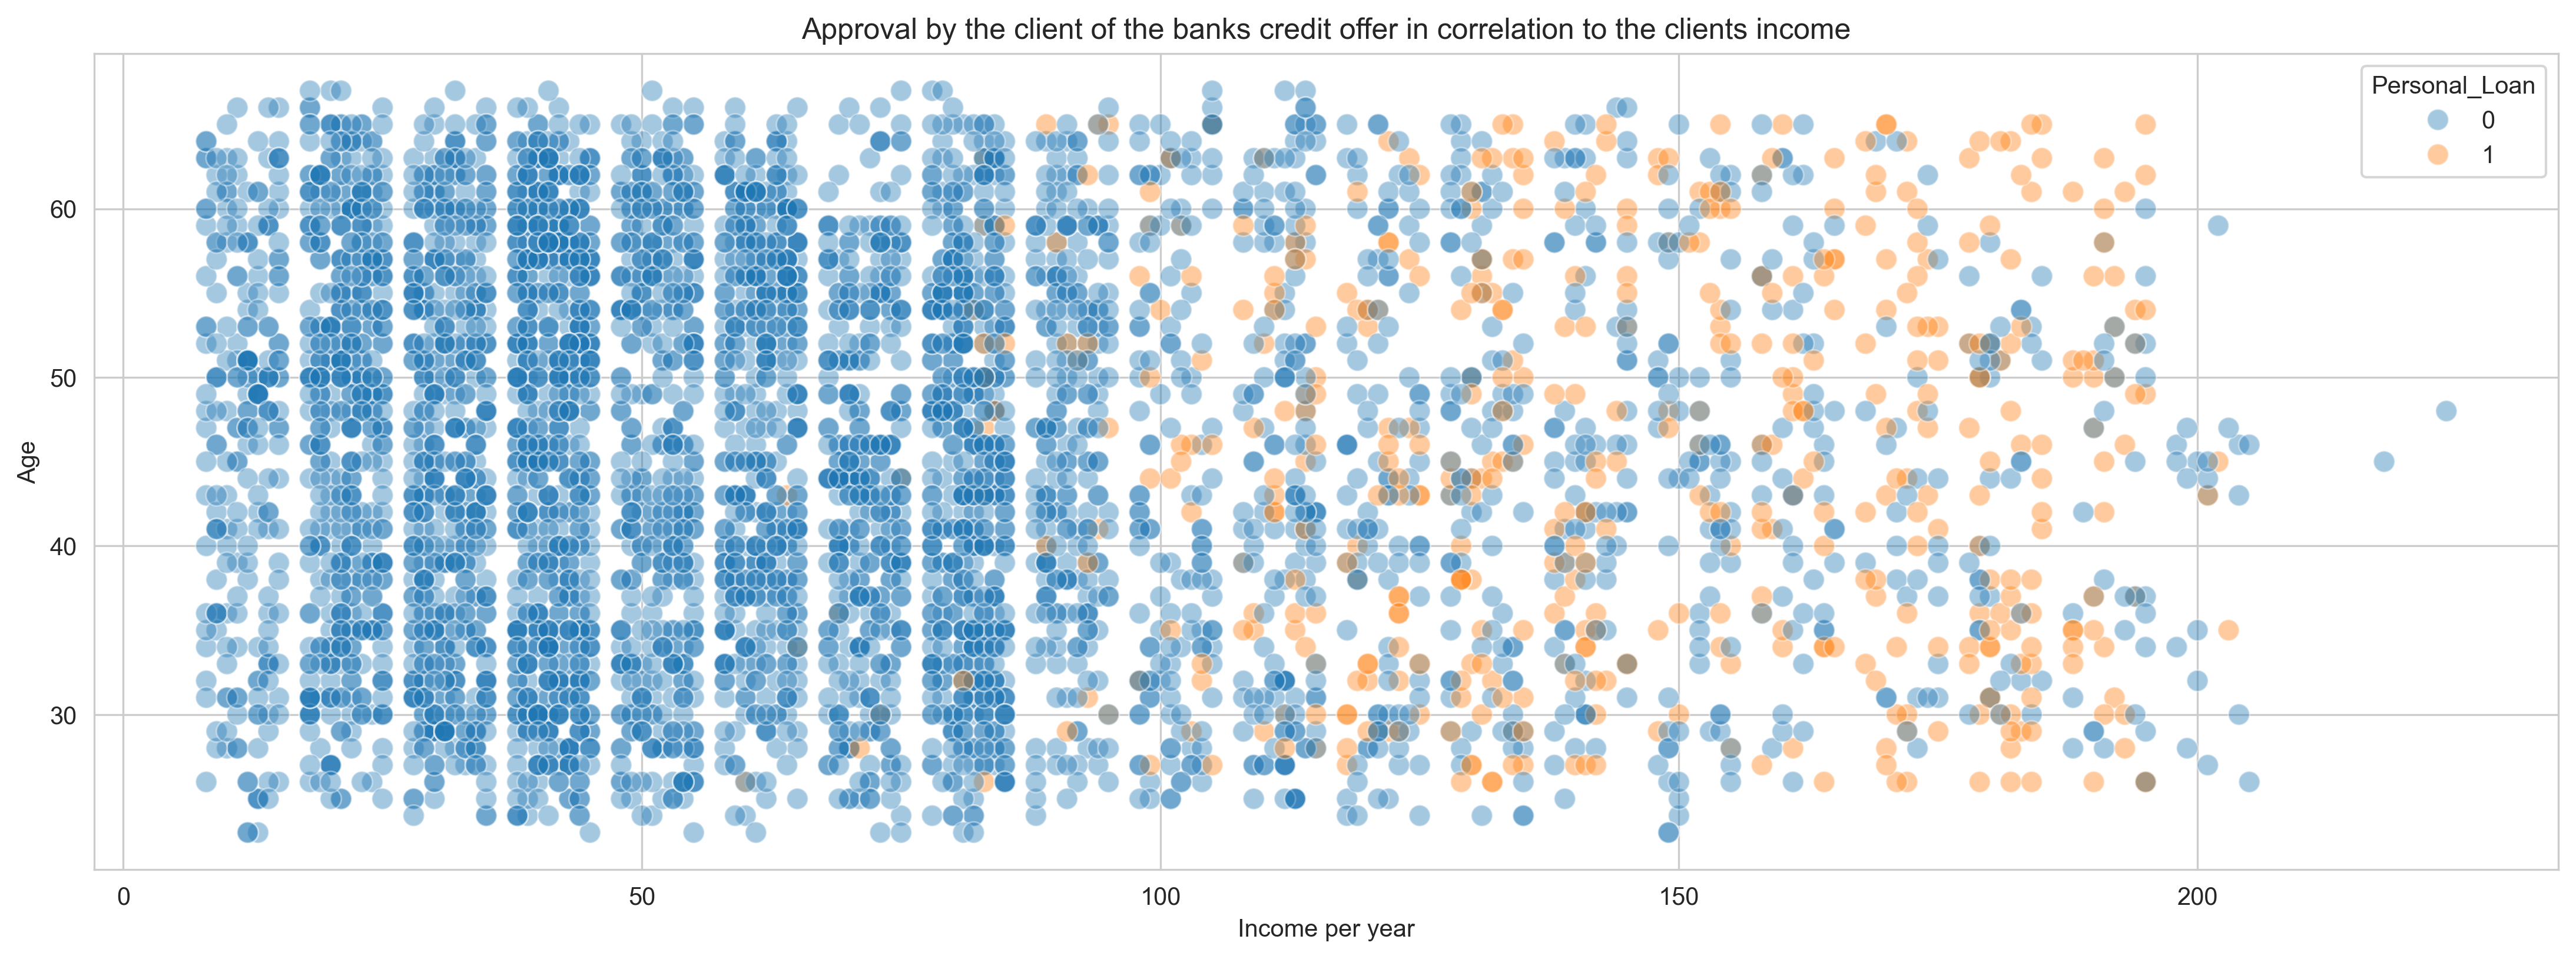

In [22]:
plt.figure(figsize=(18,6), dpi=300)

sns.scatterplot(df, x='Income', y='Age',s=75, hue='Personal_Loan',alpha=0.4)

plt.title('Approval by the client of the banks credit offer in correlation to the clients income')

plt.xlabel('Income per year')

**Visualized the use of credit money and found that customers who use more than 20k per year are also more likely to be approved for the bank's terms of credit.**

Text(0.5, 0, 'Avg. spending on credit cards per month')

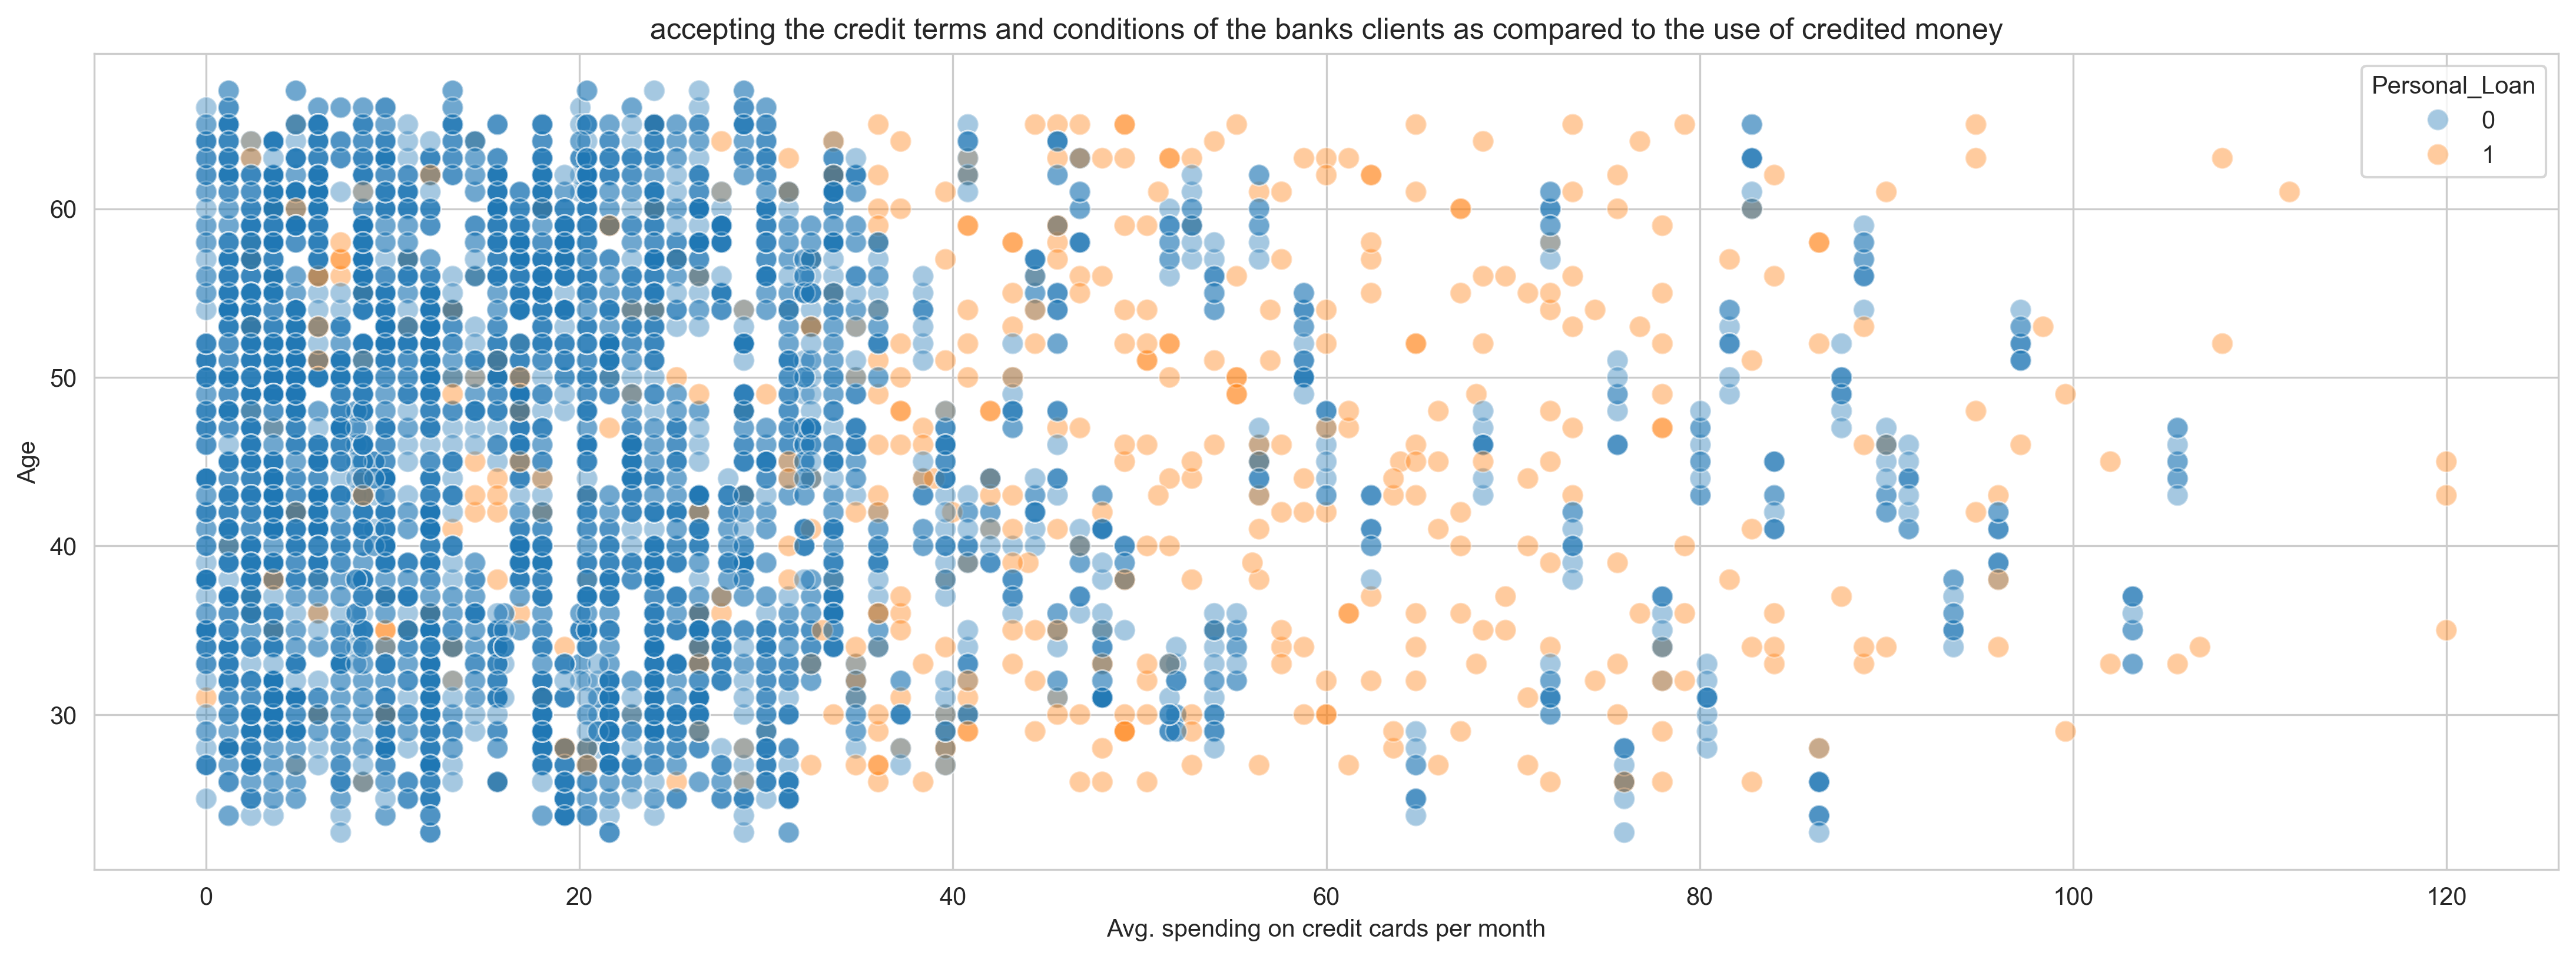

In [23]:
plt.figure(figsize=(18,6), dpi=300)

sns.scatterplot(df, x='CCAvg', y='Age',s=75, hue='Personal_Loan',alpha=0.4)

plt.title('accepting the credit terms and conditions of the banks clients as compared to the use of credited money')

plt.xlabel('Avg. spending on credit cards per month')

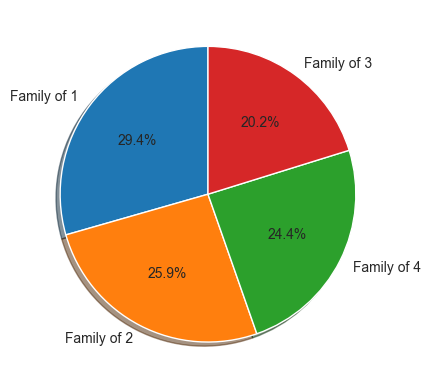

In [24]:
values_Family = df['Family'].value_counts().values
labels_Family = ['Family of 1', 'Family of 2', 'Family of 4', 'Family of 3']

fig1, ax1 = plt.subplots()
ax1.pie(values_Family, labels=labels_Family, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

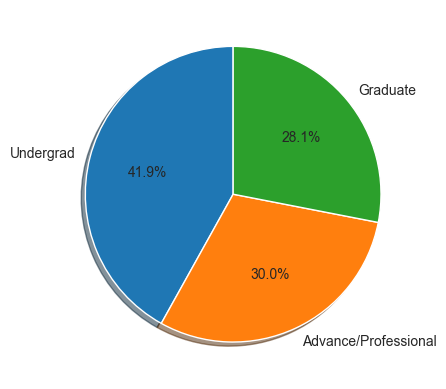

In [25]:
values_Education = df['Education'].value_counts().values
labels_Education = ['Undergrad', 'Advance/Professional', 'Graduate']

fig2, ax2 = plt.subplots()
ax2.pie(values_Education, labels=labels_Education, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

Text(0.5, 0, 'Certificate of deposit (CD) with a bank')

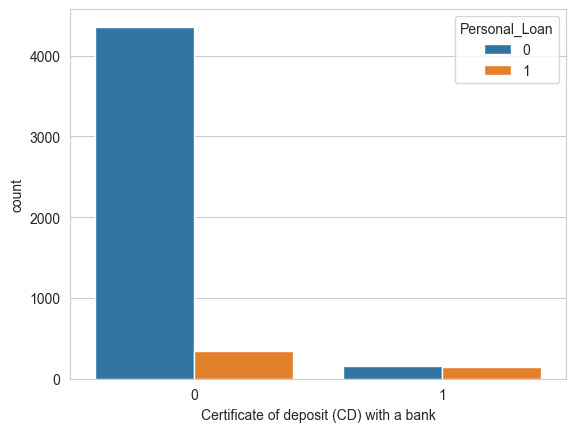

In [26]:
sns.countplot(df,x='CD_Account',hue='Personal_Loan')

plt.xlabel('Certificate of deposit (CD) with a bank')

In [27]:
df.drop(['ZIP_Code'],axis=1,inplace=True)

In [28]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4   19.2          1         0              0   
1   45          19      34       3   18.0          1         0              0   
2   39          15      11       1   12.0          1         0              0   
3   35           9     100       1   32.4          2         0              0   
4   35           8      45       4   12.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

# 6.Data Splitting

In [29]:
X=df.drop('Personal_Loan', axis=1)

y=df['Personal_Loan']

# 7.Data Scaling

In [30]:
scaler = StandardScaler()

X=scaler.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# 8.First model: logistic regression:

**Used logistic regression as the first model to deal with the task.**

In [32]:
lg_model = LogisticRegression()

**I used GridSearchCV to configure the hyperparameters, choosing values for penalty, solver, max_iter, class_weight, and l1_ratio.**
**I set class_weight=balanced,to allow for unbalanced classes.**

**I chose penalty=elasticnet to combine the benefits of L1 regularization (zeroing the coefficients) and L2 regularization (smoothing).**

In [33]:
param_grid = {
    'penalty': ['elasticnet'],            # l1 обнуляет l2 сглаживает 
    'C': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1], # обратная сила регулиризации. Чем меньше C тем силнее регуляризация
    'solver': ['saga'],                     # алгоритм оптимизации. Сага для еластик
    'max_iter': range(100, 1000, 100),     # число итераций    
    'class_weight': ['balanced'],        
    'l1_ratio': [0.1, 0.5, 0.7]             # доля мкж
}


In [34]:
grid_search = GridSearchCV(estimator=lg_model,param_grid=param_grid,scoring='balanced_accuracy',cv=5,n_jobs=-1)

In [35]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'class_weight': ['balanced'],
                         'l1_ratio': [0.1, 0.5, 0.7],
                         'max_iter': range(100, 1000, 100),
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             scoring='balanced_accuracy')

In [36]:
print('Best Parameters:', grid_search.best_params_)
print('Best result:', grid_search.best_score_)

Best Parameters: {'C': 0.3, 'class_weight': 'balanced', 'l1_ratio': 0.7, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Best result: 0.8936356121124783


In [37]:
lg_model = grid_search.best_estimator_

In [38]:
pred = lg_model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix LG')

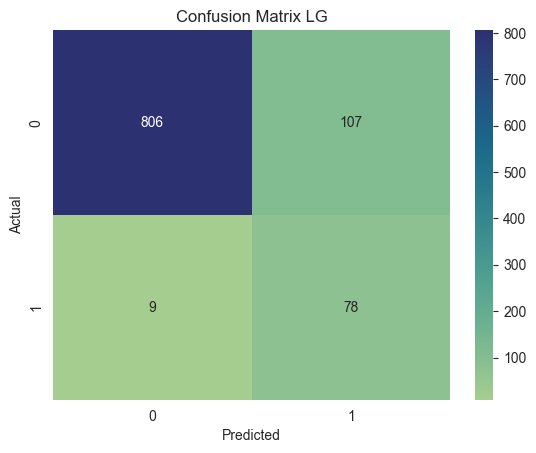

In [39]:
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f",cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix LG')

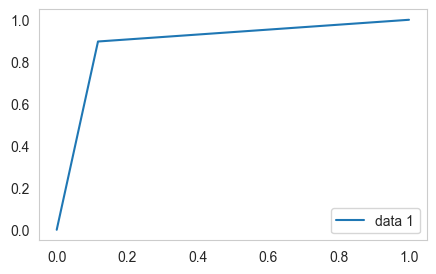

In [40]:
plt.figure(figsize=(5,3))
fpr, tpr, _ = metrics.roc_curve(y_test, pred)
plt.plot(fpr, tpr, label='data 1')
plt.legend(loc=4)
plt.grid()
plt.show()

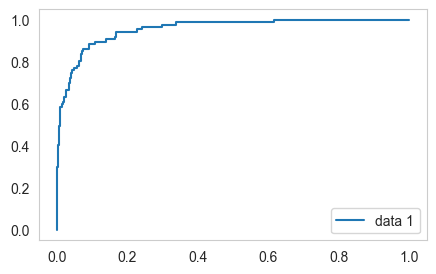

In [41]:
y_pred_proba = lg_model.predict_proba(X_test)[::,1]

plt.figure(figsize=(5,3))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1')
plt.legend(loc=4)
plt.grid()
plt.show()

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       913
           1       0.42      0.90      0.57        87

    accuracy                           0.88      1000
   macro avg       0.71      0.89      0.75      1000
weighted avg       0.94      0.88      0.90      1000



# 9.Second model: Support Vector Classifier (SVC)

In [43]:
svc_model = SVC(probability=True)

In [44]:
param_grid_svc = {
    'C':[0.001,0.01,0.1,0.5,1],# параметр регуляризации
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto'], #радиус влияния одного обьекта
    'degree':[2,3,4,5] # только для poly
}

In [45]:
grid_search_svc = GridSearchCV(estimator=svc_model,param_grid=param_grid_svc,scoring='balanced_accuracy',cv=5,n_jobs=-1)

In [46]:
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='balanced_accuracy')

In [47]:
print('Best Parameters:', grid_search_svc.best_params_)

print('Best result:', grid_search_svc.best_score_)

Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best result: 0.8759563838852659


In [48]:
svc_model=grid_search_svc.best_estimator_

In [49]:
pred_svc = svc_model.predict(X_test)

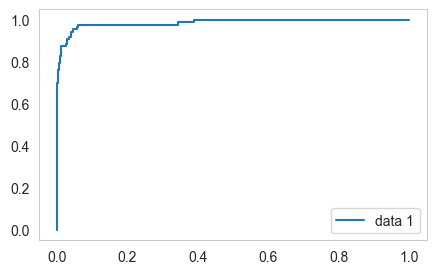

In [50]:
y_pred_proba = svc_model.predict_proba(X_test)[::,1]

plt.figure(figsize=(5,3))
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data 1')
plt.legend(loc=4)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Confusion Matrix SVC')

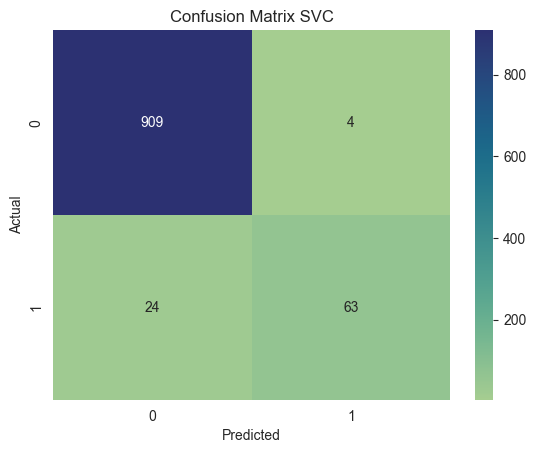

In [51]:
conf_matrix_svc = confusion_matrix(y_test, pred_svc)
sns.heatmap(conf_matrix_svc,annot=True,fmt=".0f",cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC')

In [52]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       913
           1       0.94      0.72      0.82        87

    accuracy                           0.97      1000
   macro avg       0.96      0.86      0.90      1000
weighted avg       0.97      0.97      0.97      1000



# 10.The third model: AdaBoost:

In [53]:
param_grid_ada = {             
    'learning_rate': [0.1,0.3, 0.5, 0.7, 1.0], 
    'n_estimators': [100,200,300,400]
}

In [54]:
adaboost_model = AdaBoostClassifier(algorithm='SAMME',learning_rate=42)

In [55]:
grid_search_ada = GridSearchCV(estimator=adaboost_model,param_grid=param_grid_ada,scoring='balanced_accuracy',cv=5,n_jobs=-1)

In [56]:
grid_search_ada.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME', learning_rate=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='balanced_accuracy')

In [57]:
print('Best Parameters:', grid_search_ada.best_params_)

print('Best result:', grid_search_ada.best_score_)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 400}
Best result: 0.8789749371824958


In [58]:
adaboost_model = grid_search_ada.best_estimator_

In [59]:
pred_ada = adaboost_model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix ADABoost')

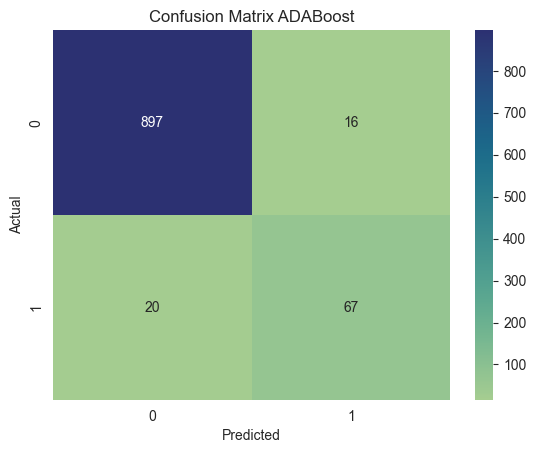

In [60]:
conf_matrix_svc = confusion_matrix(y_test, pred_ada)

sns.heatmap(conf_matrix_svc,annot=True,fmt=".0f",cmap="crest")

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix ADABoost')

In [61]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       913
           1       0.81      0.77      0.79        87

    accuracy                           0.96      1000
   macro avg       0.89      0.88      0.88      1000
weighted avg       0.96      0.96      0.96      1000



In [62]:
all_pred = lg_model.predict(X)

Text(0.5, 1.0, 'Confusion Matrix SVC')

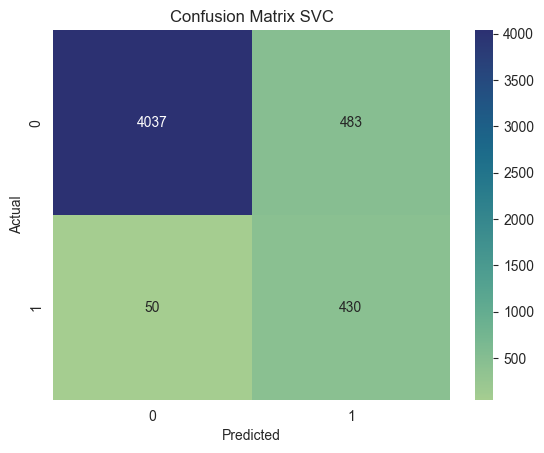

In [63]:
conf_matrix_svc = confusion_matrix(y, all_pred)

sns.heatmap(conf_matrix_svc,annot=True,fmt=".0f",cmap="crest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix SVC')

In [64]:
print(classification_report(y, all_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      4520
           1       0.47      0.90      0.62       480

    accuracy                           0.89      5000
   macro avg       0.73      0.89      0.78      5000
weighted avg       0.94      0.89      0.91      5000



# Model choice subsumption:
* I chose logistic regression to deal with the task because it tends to show a mistake in the side that the model predicts that a person will accept the loan terms (1), but in fact did not. This is important because, in the context of this project, to err on the side of making offers to customers is less critical than missing out on potential customers.
* False positives (where the model says the person will accept the loan, but the person refuses) are less dangerous because we can still offer the customer the terms. Whereas false negatives (when the model says that the customer will not accept the terms, but in fact they will) is a mistake that we need to minimize because we lose the ability to offer beneficial terms to those who are willing to accept them.
* As a result, logistic regression showed acceptable results in this task, focusing on minimizing the loss of lost customers.
rs.